### <center> Methods of Reducing Dimensionality </center>

### Risk Factors for Cardiovascular Heart Disease
###### Examining Age, Gender, Height, Weight and Health Metrics
######  https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas


This dataset can be used to explore the risk factors of cardiovascular disease in adults. This dataset contains detailed information on the risk factors for cardiovascular disease. It includes information on age, gender, height, weight, blood pressure values, cholesterol levels, glucose levels, smoking habits and alcohol consumption of over 70 thousand individuals. 

<b> Age:</b> Age of participant (integer) 

<b>Gender:</b> Gender of participant (male/female).

<b>Height:</b> Height measured in centimeters (integer)

<b>Weight:</b> Weight measured in kilograms (integer)

<b>Ap_hi:</b> Systolic blood pressure reading taken from patient (integer)

<b>Ap_lo:</b> Diastolic blood pressure reading taken from patient (integer)

<b>Cholesterol:</b> Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively. 

<b>Gluc:</b> Glucose level read as mmol/l on a scale 0 - 16+ units( integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.

<b>Smoke:</b> Whether person smokes or not(binary; 0= No , 1=Yes).

<b>Alco:</b> Whether person drinks alcohol or not(binary; 0=No ,1 =Yes ). 

<b>Active:</b> whether person physically active or not( Binary ;0 =No,1 = Yes ).

<b>Cardio:</b> whether person suffers from cardiovascular diseases or not(Binary ;0=No , 1=Yes )

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# from sklearn.preprocessing import RobustScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# from sklearn.decomposition import PCA

# from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reads the data

df = pd.read_csv("./heart_data.csv")

In [3]:
# Displays only the first few rows of the dataset

df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Computes the number of rows and columns of the dataset

rows = len(df.axes[0])
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  70000
Number of Columns:  14


In [5]:
# Prints the types of each of the variables in the dataset

print(df.dtypes)

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [6]:
# Counts the number of each datatypes in the dataset

df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [7]:
# Calculates the statistical description of the data

df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Prints the information of the variables of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [9]:
df['gender'] = df['gender'].replace({1: 0, 2: 1})

In [10]:
# Describes a variable in terms of another variable

df.groupby('gender').height.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,45530.0,161.355612,7.052726,55.0,157.0,161.0,166.0,250.0
1,24470.0,169.947895,7.228895,65.0,165.0,170.0,175.0,207.0


In [11]:
# Since the average of height of men is more than women,
# 1 : 0 represents women
# 2 : 1 represents men

In [12]:

# Calculates the number of unique outputs for each variable

df.nunique()

index          70000
id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [13]:
# True if there are missing value, False if there is not missing value

df.isnull()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Calculates or sum up all the missing values

df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
# True if there is duplicate, False if there is not

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [16]:
# Counts all the duplicates in the dataset

df.duplicated().sum()

0

In [17]:
# Counts the number of duplicates in id variable

df.id.duplicated().sum()

0

In [71]:
# Removes index variable
df.drop('index', axis=1, inplace=True)

In [19]:
#Removes id Variable

# df.drop('id', axis=1, inplace=True)

In [20]:
# Coverts days to years
# Assuming that age is in days, I converted it to years using the following equation

df['age'] = df['age'].apply(lambda x: x // 365)

In [21]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,4,47,0,156,56.0,100,60,1,1,0,0,0,0


In [72]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#different

train, test = train_test_split(df, test_size=0.3, random_state=0)

In [23]:
# X = df.drop('id', axis=1, inplace=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_st =  StandardScaler().fit_transform(train)  
  
pd.DataFrame(df_st, columns=train.columns).head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1.241795,1.350465,-0.734655,0.811670,2.218038,0.220988,4.846447,0.933089,1.355658,-0.312365,-0.239539,0.494701,0.999266
1,-1.082866,-1.611558,1.361183,1.056373,-0.366436,-0.131215,-0.144879,-0.540083,-0.395884,3.201383,-0.239539,-2.021424,-1.000735
2,-1.074854,1.350465,1.361183,0.322264,0.262220,0.080107,-0.037539,-0.540083,-0.395884,-0.312365,-0.239539,0.494701,0.999266
3,-0.484618,-0.722951,1.361183,-0.901251,0.401921,-0.060774,-0.091209,-0.540083,-0.395884,3.201383,-0.239539,0.494701,-1.000735
4,-0.969272,-1.463457,1.361183,0.077561,-1.134793,-0.060774,-0.091209,-0.540083,-0.395884,3.201383,-0.239539,0.494701,-1.000735


In [25]:
pca_out = PCA().fit(df_st)

# get the component variance
# Proportion of Variance (from PC1 to PC13)
pca_out.explained_variance_ratio_

array([0.14984818, 0.13382832, 0.08946352, 0.08136556, 0.07716743,
       0.07678443, 0.07546447, 0.07494598, 0.06358133, 0.05548654,
       0.04740382, 0.04027419, 0.03438624])

In [26]:
# Cumulative proportion of variance (from PC1 to PC13)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.14984818, 0.28367651, 0.37314003, 0.45450558, 0.53167302,
       0.60845744, 0.68392191, 0.75886789, 0.82244922, 0.87793576,
       0.92533958, 0.96561376, 1.        ])

In [27]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
variable,,,,,,,,,,,,,
id,-0.000048,0.013184,-0.001719,0.022342,0.910864,-0.239079,-0.239240,0.233733,-0.013422,0.007145,0.019163,0.002291,-0.004676
age,0.057242,0.363254,0.157553,0.362358,-0.013976,-0.283717,-0.113571,-0.401141,0.445619,0.496009,0.050526,-0.016086,-0.082023
gender,-0.548790,-0.077589,0.125937,-0.067432,0.024717,-0.021953,-0.010644,-0.064729,0.410860,-0.183722,-0.127215,-0.029020,0.668895
height,-0.516199,-0.068953,0.319136,-0.276451,0.043837,0.083996,-0.006654,-0.041102,0.142594,0.014933,-0.282078,-0.045506,-0.661517
weight,-0.321438,0.271966,0.339340,-0.173699,0.009011,0.102724,-0.036913,-0.032337,-0.585978,0.412287,0.319635,0.015960,0.220399
ap_hi,-0.024866,0.075343,0.164770,0.344403,0.233004,0.277762,0.819921,0.180967,0.083027,0.066147,0.012389,-0.001699,-0.007446
ap_lo,-0.032897,0.086652,0.163647,0.385280,-0.160713,0.453011,-0.462743,0.581339,0.164665,0.073051,0.013728,-0.009364,-0.018084
cholesterol,-0.031000,0.572610,-0.271330,-0.185228,0.005758,0.067055,0.040708,0.086984,0.045262,-0.140695,-0.025828,-0.725689,-0.018390
gluc,-0.027147,0.497897,-0.320484,-0.367216,0.003118,0.103482,0.072075,0.179087,0.209285,0.064662,-0.042032,0.644954,-0.010242


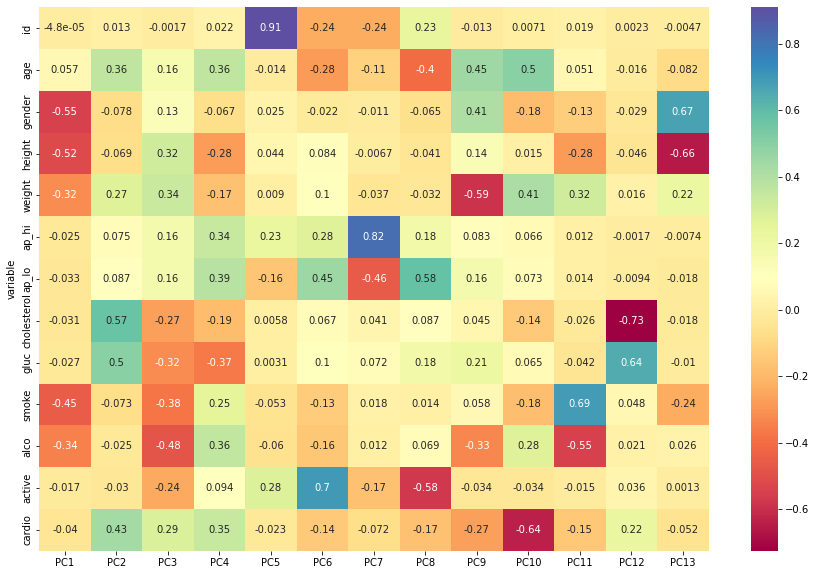

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize =(15, 10))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [29]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([1.94806615, 1.73980371, 1.16304951, 1.0577738 , 1.0031971 ,
       0.9982179 , 0.98105807, 0.97431764, 0.82657419, 0.72133971,
       0.61626222, 0.52357512, 0.4470302 ])

In [30]:
# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])
# Scree plot will be saved in the same directory with name screeplot.png

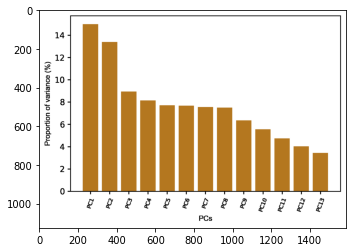

In [31]:
# Python program to read image using OpenCV
 
# importing OpenCV(cv2) module
import cv2
 
# Save image in set directory
# Read RGB image
img = cv2.imread('screeplot.png')

plt.imshow(img)
plt.show()

In [32]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

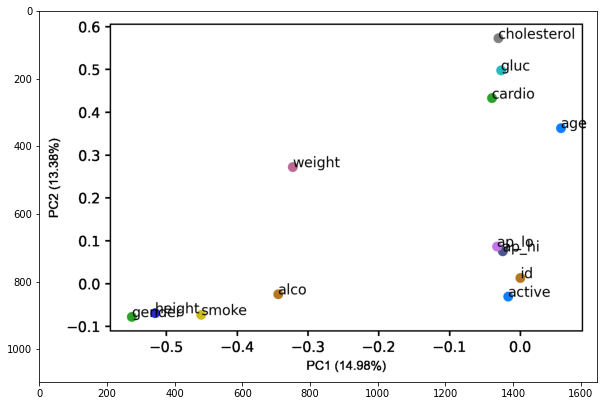

In [33]:
plt.figure(figsize =(10, 10))
two_d = cv2.imread('pcaplot_2d.png')

plt.imshow(two_d)
plt.show()

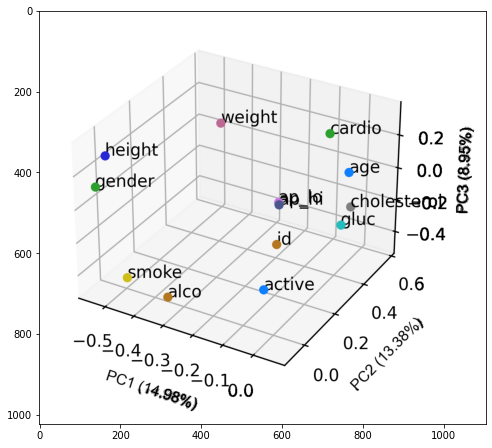

In [34]:
plt.figure(figsize =(8, 8))
three_d = cv2.imread('pcaplot_3d.png')

plt.imshow(three_d)
plt.show()

In [35]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

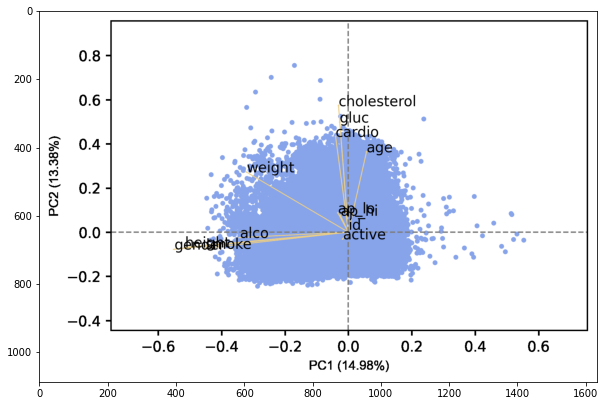

In [36]:
plt.figure(figsize =(10, 10))
biplot_2d = cv2.imread('biplot_2d.png')

plt.imshow(biplot_2d)
plt.show()

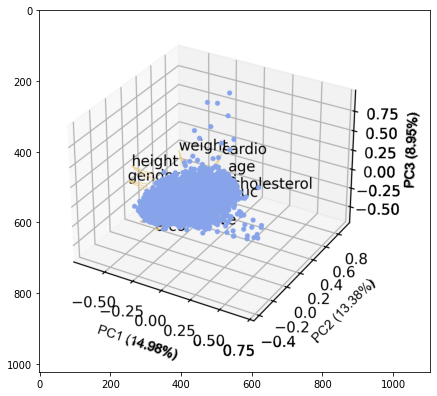

In [37]:
plt.figure(figsize =(7, 7))
biplot_3d = cv2.imread('biplot_3d.png')

plt.imshow(biplot_3d)
plt.show()

In [38]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

In [39]:
train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
59982,85633,62,0,171,106.0,160,1000,2,2,0,0,1,1
13048,18611,42,1,173,69.0,110,70,1,1,1,0,0,0
13206,18842,62,1,167,78.0,140,90,1,1,0,0,1,1
25113,35859,48,1,157,80.0,120,80,1,1,1,0,1,0
15311,21886,43,1,165,58.0,120,80,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,30345,63,0,158,76.0,120,80,3,3,0,0,0,1
45891,65548,63,1,170,122.0,130,80,3,3,0,1,1,1
42613,60883,61,1,174,72.0,120,80,1,1,0,0,1,0
43567,62243,50,0,153,85.0,120,80,1,1,0,0,1,0


In [40]:
X = train.iloc[:,0:12]
target = train['cardio'].to_numpy()
X.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
59982,85633,62,0,171,106.0,160,1000,2,2,0,0,1
13048,18611,42,1,173,69.0,110,70,1,1,1,0,0


In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_st =  StandardScaler().fit_transform(X)
X_st = pd.DataFrame(X_st)
X_st.columns = X.columns
X_adjusted = X_st - X_st.mean()
X_adjusted.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1.241795,1.350465,-0.734655,0.811670,2.218038,0.220988,4.846447,0.933089,1.355658,-0.312365,-0.239539,0.494701
1,-1.082866,-1.611558,1.361183,1.056373,-0.366436,-0.131215,-0.144879,-0.540083,-0.395884,3.201383,-0.239539,-2.021424


In [42]:
X_adjusted.cov()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,1.000020e+00,0.005179,0.003567,2.059567e-07,-0.001538,0.004514,-0.004463,0.006451,0.003715,-0.005710,0.002509,0.003770
age,5.179400e-03,1.000020,-0.023287,-8.249784e-02,0.052584,0.017949,0.015020,0.152422,0.098643,-0.051761,-0.029751,-0.011202
gender,3.567353e-03,-0.023287,1.000020,5.009841e-01,0.156382,0.011956,0.014116,-0.036354,-0.020238,0.338174,0.170484,0.004414
height,2.059567e-07,-0.082498,0.500984,1.000020e+00,0.292156,0.007936,0.004798,-0.050901,-0.022500,0.189651,0.095780,-0.004148
weight,-1.538225e-03,0.052584,0.156382,2.921558e-01,1.000020,0.029316,0.041652,0.143283,0.109923,0.069927,0.067324,-0.013892
ap_hi,4.513601e-03,0.017949,0.011956,7.936427e-03,0.029316,1.000020,0.017944,0.022009,0.006949,-0.000631,0.002930,0.000569
ap_lo,-4.463211e-03,0.015020,0.014116,4.797777e-03,0.041652,0.017944,1.000020,0.023599,0.009616,0.001209,0.010689,0.002604
cholesterol,6.450807e-03,0.152422,-0.036354,-5.090103e-02,0.143283,0.022009,0.023599,1.000020,0.452712,0.009934,0.032539,0.010057
gluc,3.715205e-03,0.098643,-0.020238,-2.249954e-02,0.109923,0.006949,0.009616,0.452712,1.000020,-0.004967,0.008838,-0.006702
smoke,-5.709992e-03,-0.051761,0.338174,1.896508e-01,0.069927,-0.000631,0.001209,0.009934,-0.004967,1.000020,0.346815,0.027506


In [43]:
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(X_adjusted.cov())
eigenvalues


array([1.94708658, 1.57837934, 0.44792693, 0.53833444, 0.62112801,
       0.80752192, 1.13519948, 0.93523928, 1.01721686, 1.00307843,
       0.97981898, 0.98931464])

In [44]:
eigenvectors

array([[-5.27673760e-04, -1.32953646e-02,  5.02426669e-03,
        -5.86072034e-03, -1.73238560e-02, -1.36683381e-02,
        -4.87990402e-03, -4.92127066e-02,  2.86590557e-02,
        -9.31191705e-01,  3.33362951e-01, -1.33268635e-01],
       [-7.43939013e-02, -3.18324589e-01,  9.82508911e-02,
        -8.51421509e-02,  4.21807003e-02,  6.89128062e-02,
         5.63228474e-02,  9.13080402e-01,  1.11154395e-01,
        -1.88254270e-02,  6.06842418e-03, -1.41667877e-01],
       [ 5.51465994e-01,  6.22111698e-02, -6.70598387e-01,
         8.63084539e-02,  9.44065084e-02,  4.38211836e-01,
         1.37129443e-01,  1.08544630e-01, -4.28450883e-02,
        -2.97939615e-02, -1.61803818e-02,  1.87048902e-02],
       [ 5.18713260e-01,  5.25423226e-02,  6.61074642e-01,
         3.88155206e-02,  2.89315254e-01,  1.45504150e-01,
         3.98067176e-01, -2.64269360e-02, -9.15094825e-02,
        -3.78750281e-02, -3.28467252e-02,  1.21373336e-01],
       [ 3.08740616e-01, -2.69913060e-01, -2.0858945

In [45]:
pca_out = PCA().fit(X_adjusted)

In [46]:
loadings = pca_out.components_
loadings

array([[ 5.27673760e-04,  7.43939013e-02, -5.51465994e-01,
        -5.18713260e-01, -3.08740616e-01, -2.10126142e-02,
        -2.84436289e-02, -7.89997331e-03, -8.88497128e-03,
        -4.54074271e-01, -3.43547148e-01, -1.91390754e-02],
       [ 1.32953646e-02,  3.18324589e-01, -6.22111698e-02,
        -5.25423226e-02,  2.69913060e-01,  5.59931103e-02,
         6.44166002e-02,  6.50856806e-01,  6.21728553e-01,
        -3.58875217e-02,  1.37279211e-02, -9.30764702e-03],
       [-4.87990402e-03,  5.63228474e-02,  1.37129443e-01,
         3.98067176e-01,  4.14201834e-01,  1.11534062e-01,
         9.70612623e-02, -1.12258788e-01, -8.08840213e-02,
        -4.51541050e-01, -5.80214339e-01, -2.57751447e-01],
       [ 2.86590557e-02,  1.11154395e-01, -4.28450883e-02,
        -9.15094825e-02,  9.26953326e-03,  6.58759804e-01,
         6.72581596e-01, -6.05677882e-02, -1.36106908e-01,
         2.31791870e-02,  8.73989643e-02,  2.44597351e-01],
       [ 9.31191705e-01,  1.88254270e-02,  2.9793961

In [47]:
pca_out.explained_variance_

array([1.94708658, 1.57837934, 1.13519948, 1.01721686, 1.00307843,
       0.98931464, 0.97981898, 0.93523928, 0.80752192, 0.62112801,
       0.53833444, 0.44792693])

In [48]:
from bioinfokit.visuz import cluster

pca_scores = PCA().fit_transform(X_adjusted)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target)

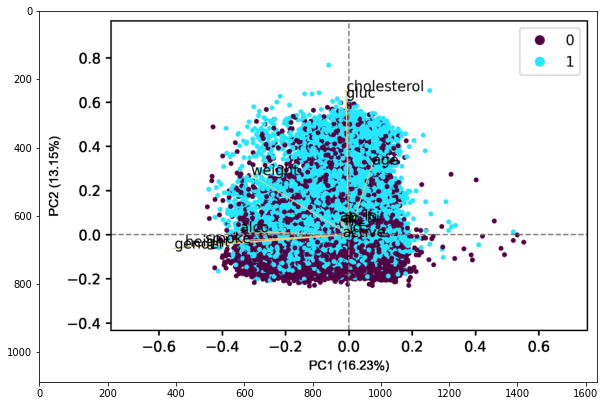

In [49]:
import cv2

plt.figure(figsize =(10, 10))
biplot_2d = cv2.imread('biplot_2d.png')

plt.imshow(biplot_2d)
plt.show()

In [22]:
X = df.drop('id', axis=1)
y = df["id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
X_train.shape, X_test.shape

((49000, 12), (21000, 12))

In [24]:
X_train.corr().style.background_gradient(cmap="GnBu")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023287,-0.082496,0.052583,0.017949,0.015020,0.152419,0.098641,-0.051759,-0.029750,-0.011201,0.237906
gender,-0.023287,1.000000,0.500974,0.156379,0.011955,0.014116,-0.036353,-0.020237,0.338167,0.170480,0.004414,0.001855
height,-0.082496,0.500974,1.000000,0.292150,0.007936,0.004798,-0.050900,-0.022499,0.189647,0.095778,-0.004148,-0.014371
weight,0.052583,0.156379,0.292150,1.000000,0.029315,0.041651,0.143280,0.109920,0.069926,0.067322,-0.013892,0.180540
ap_hi,0.017949,0.011955,0.007936,0.029315,1.000000,0.017944,0.022008,0.006949,-0.000631,0.002930,0.000569,0.057959
ap_lo,0.015020,0.014116,0.004798,0.041651,0.017944,1.000000,0.023599,0.009615,0.001209,0.010689,0.002604,0.068346
cholesterol,0.152419,-0.036353,-0.050900,0.143280,0.022008,0.023599,1.000000,0.452703,0.009934,0.032538,0.010057,0.220820
gluc,0.098641,-0.020237,-0.022499,0.109920,0.006949,0.009615,0.452703,1.000000,-0.004967,0.008838,-0.006702,0.088966
smoke,-0.051759,0.338167,0.189647,0.069926,-0.000631,0.001209,0.009934,-0.004967,1.000000,0.346808,0.027505,-0.020165
alco,-0.029750,0.170480,0.095778,0.067322,0.002930,0.010689,0.032538,0.008838,0.346808,1.000000,0.025340,-0.009275


In [25]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
59982,62,1,171,106.0,160,1000,2,2,0,0,1,1
13048,42,2,173,69.0,110,70,1,1,1,0,0,0
13206,62,2,167,78.0,140,90,1,1,0,0,1,1
25113,48,2,157,80.0,120,80,1,1,1,0,1,0
15311,43,2,165,58.0,120,80,1,1,1,0,1,0


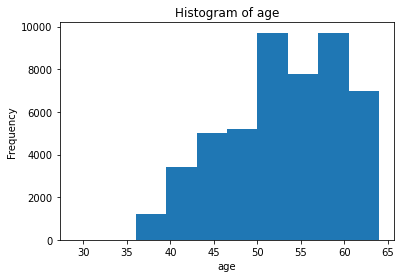

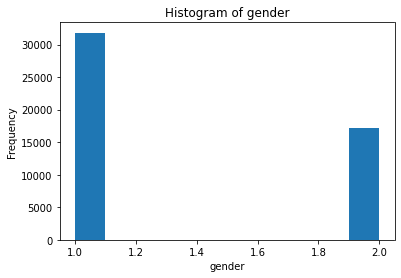

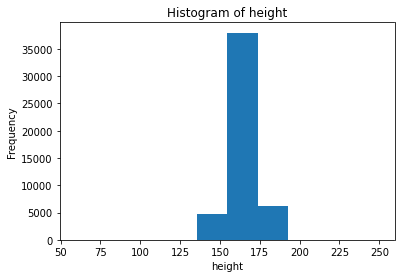

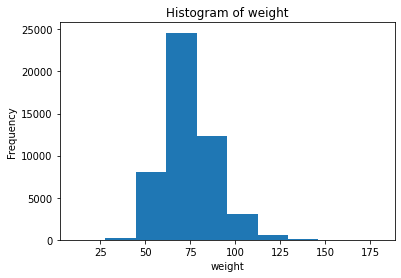

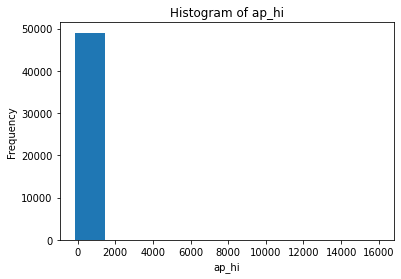

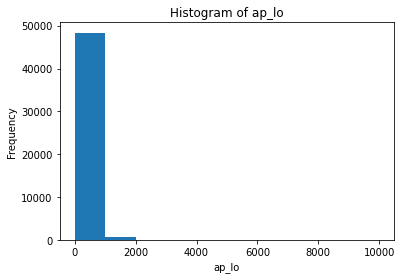

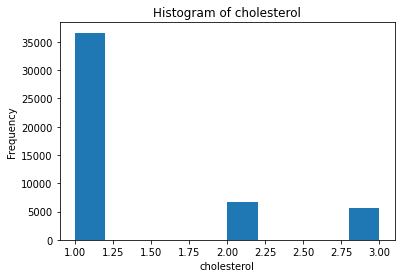

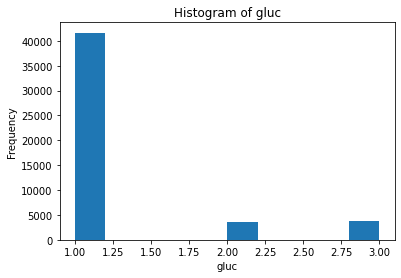

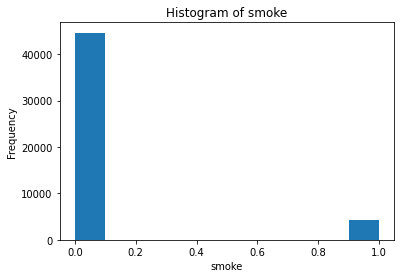

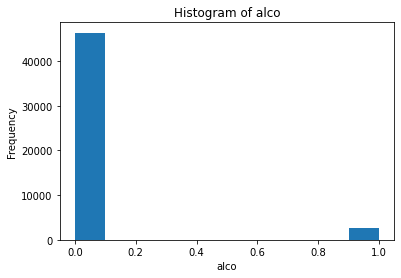

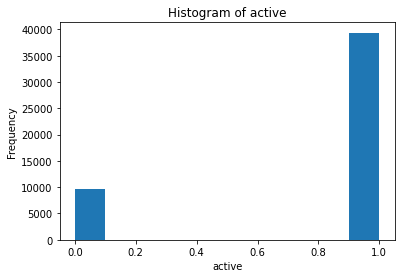

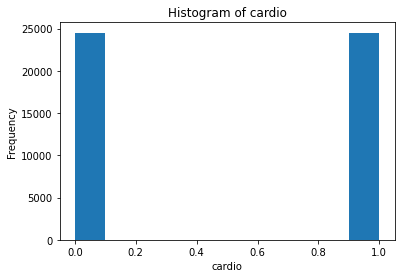

In [26]:
for column in X_train.columns:
    fig, ax = plt.subplots()
    ax.hist(X_train[column], bins=10)
    ax.set_title('Histogram of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plt.show()

In [28]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler
 
scalar = StandardScaler()
 
# fitting
scalar.fit(X_train)
scaled_data = scalar.transform(X_train)
 
# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
 
x_pca.shape

(49000, 2)

Text(0, 0.5, 'Second Principal Component')

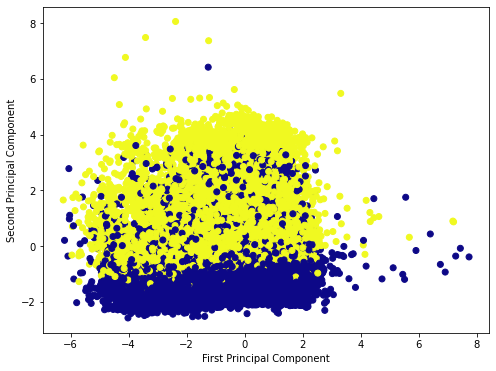

In [29]:
# giving a larger plot
plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = X_train['cardio'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [30]:
# components
pca.components_

array([[ 0.05724262, -0.54879012, -0.51619908, -0.32143747, -0.02486562,
        -0.03289703, -0.0309985 , -0.02714561, -0.45091071, -0.3422477 ,
        -0.01732187, -0.04020997],
       [ 0.36325142, -0.07764634, -0.06896702,  0.27204769,  0.07528255,
         0.08675093,  0.57265254,  0.49795872, -0.0729309 , -0.02463729,
        -0.03010559,  0.43282073]])

<AxesSubplot:>

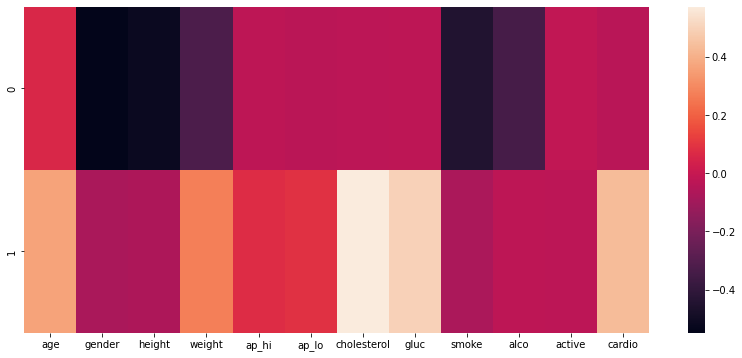

In [31]:
df_comp = pd.DataFrame(pca.components_, columns = X_train.columns)
 
plt.figure(figsize =(14, 6))
 
# plotting heatmap
sns.heatmap(df_comp)

Feature: 0, Score: 0.04592
Feature: 1, Score: 0.02443
Feature: 2, Score: 0.00545
Feature: 3, Score: 0.50518
Feature: 4, Score: 0.00687
Feature: 5, Score: 0.31412
Feature: 6, Score: 0.07459
Feature: 7, Score: 0.00550
Feature: 8, Score: 0.00653
Feature: 9, Score: 0.00555
Feature: 10, Score: 0.00586


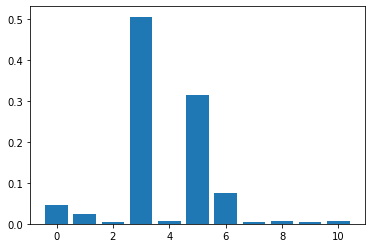

In [33]:
# random forest for feature importance
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
features = train.columns
X, y = make_regression(n_samples=1000, n_features=11, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [37]:
## The example uses dimensionality reduction and a logistic regression prediction model to evaluate the modeling pipeline.
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [42]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [26]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler
 
scalar = StandardScaler()
 
# fitting
scalar.fit(X_train)
scaled_data = scalar.transform(X_train)
 
# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
 
x_pca.shape

(49000, 2)

In [27]:
explained_variance = pca.explained_variance_ratio_

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

KeyboardInterrupt: 

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [27]:
# giving a larger plot
plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = X_train['cardio'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

NameError: name 'x_pca' is not defined

<Figure size 576x432 with 0 Axes>

In [33]:
# components
pca.components_

array([[5.61080908e-04, 3.69827849e-05, 2.22451640e-04, 3.27259544e-03,
        3.25541962e-02, 9.99464409e-01, 8.80186711e-05, 3.00530633e-05,
        1.84970329e-06, 1.30927171e-05, 5.57172363e-06, 1.87216493e-04]])

<AxesSubplot:>

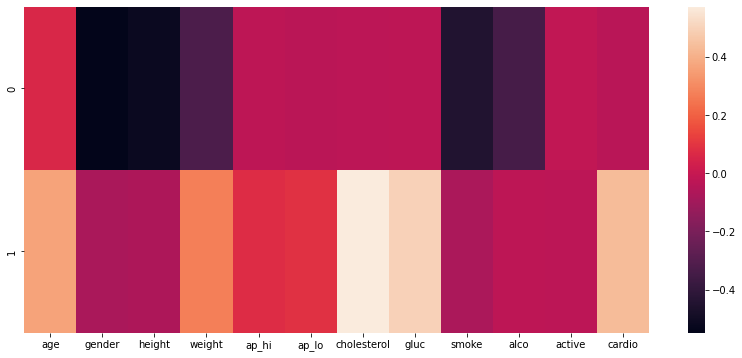

In [35]:
df_comp = pd.DataFrame(pca.components_, columns = X_train.columns)
 
plt.figure(figsize =(14, 6))
 
# plotting heatmap
sns.heatmap(df_comp)

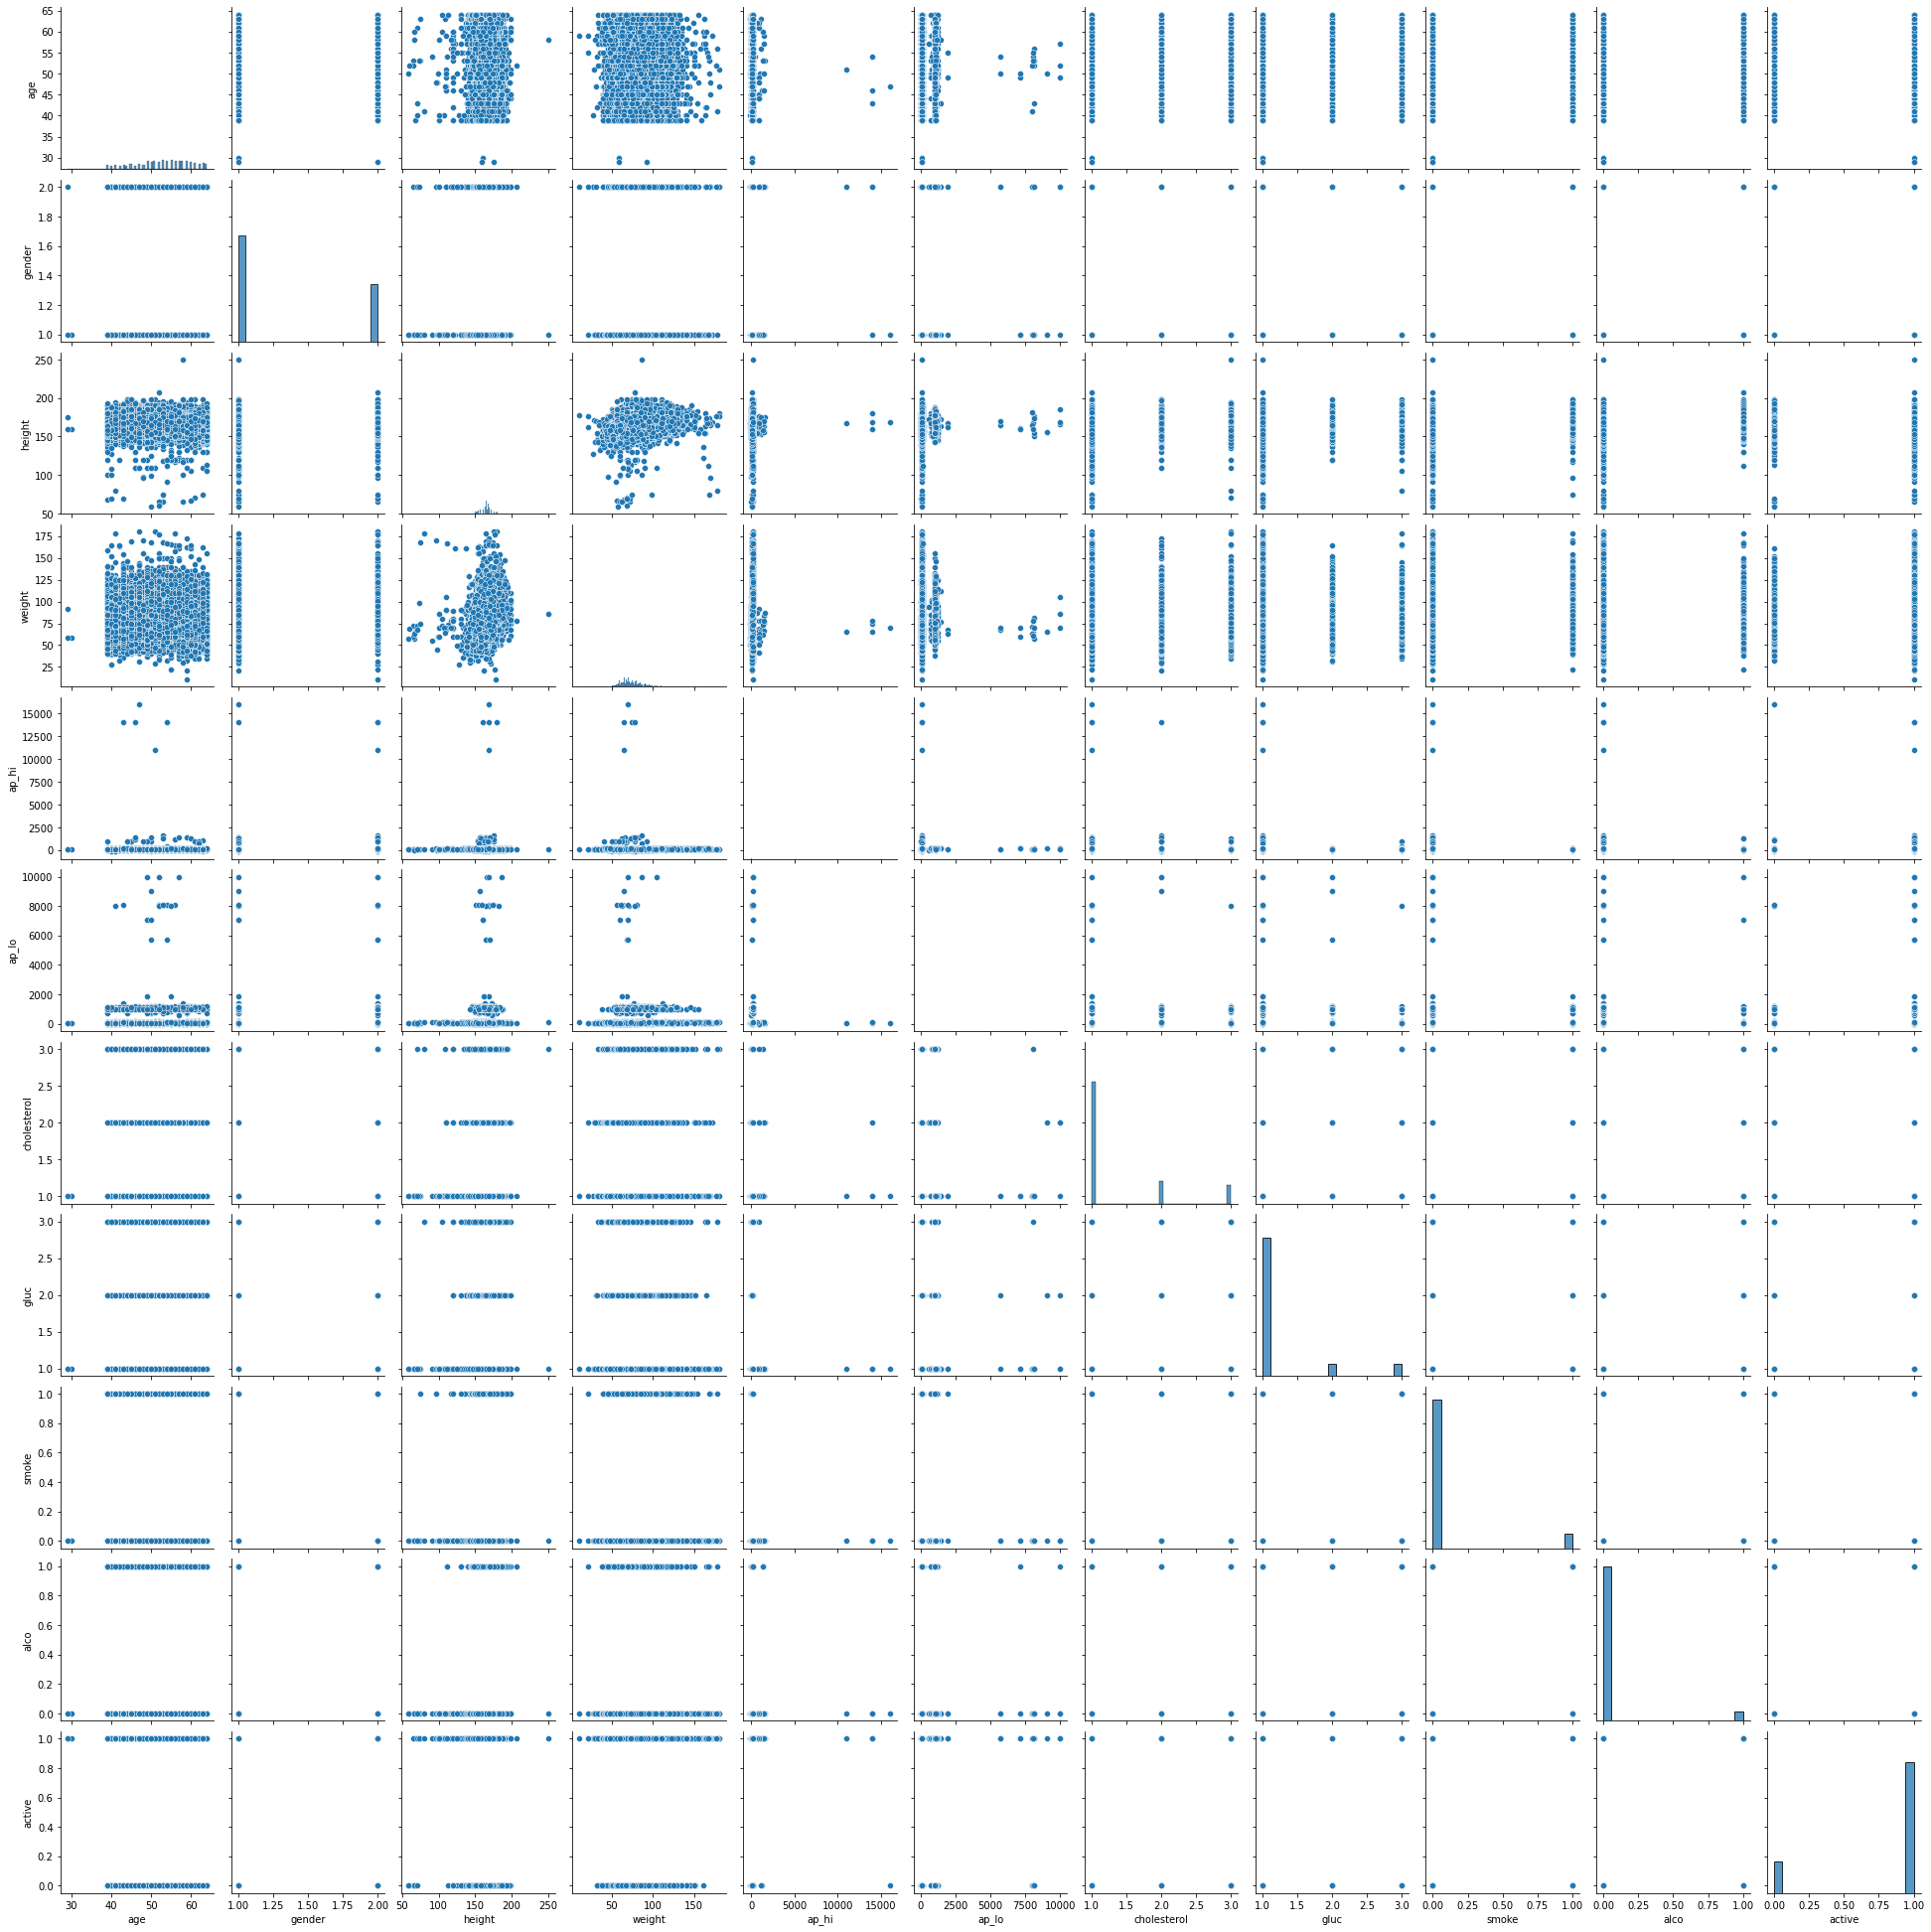

In [29]:
sns.pairplot(X_train)
plt.show()

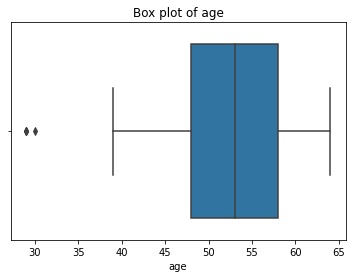

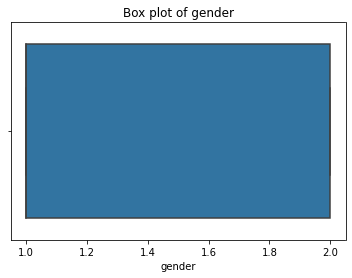

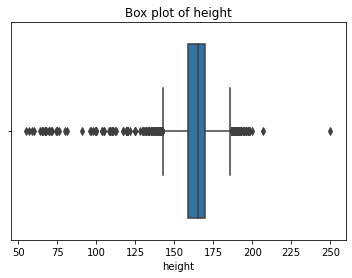

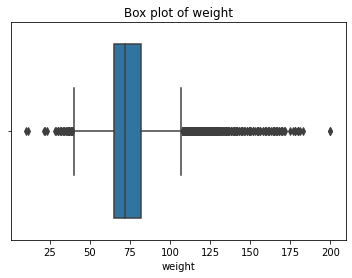

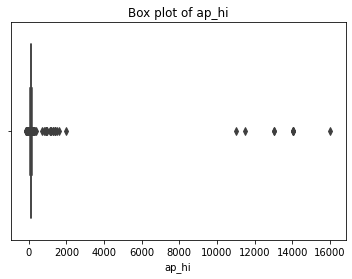

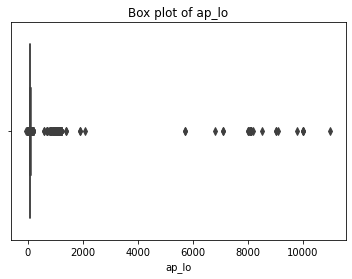

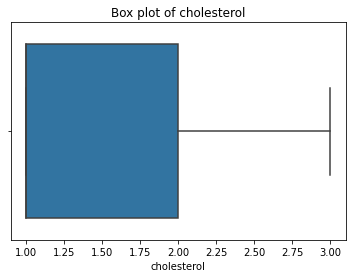

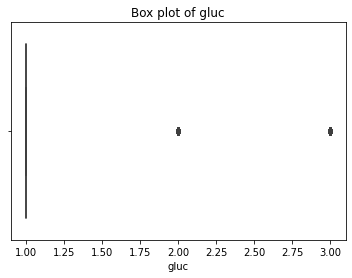

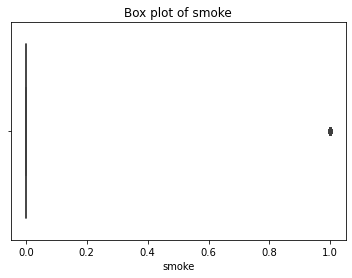

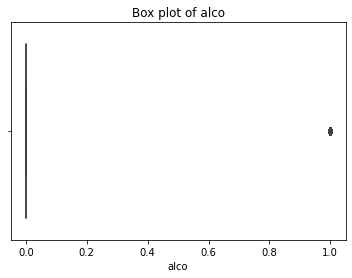

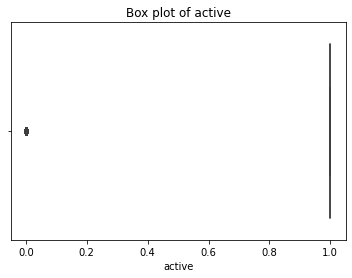

In [26]:
for column in X_train.columns:
    fig, ax = plt.subplots()
    sns.boxplot(x=df[column])
    ax.set_title('Box plot of {}'.format(column))
    ax.set_xlabel(column)
    plt.show()

In [66]:
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [39]:
X = X_train.drop('id', axis=1)
y = X_train["id"]

cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [40]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [41]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [42]:
rfc = RandomForestClassifier(random_state=0)

In [ ]:
# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)


In [32]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7058


In [33]:
# instantiate the classifier with n_estimators = 1000

rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=0)



# fit the model to the training set

rfc_1000.fit(X_train, y_train)


# Predict on the test set results

y_pred_1000 = rfc_1000.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1000)))

Model accuracy score with 1000 decision-trees : 0.7083


In [34]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(cols)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Feature: 0, Score: 38.69892


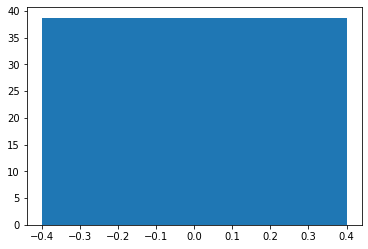

In [46]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=1, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.04584
Feature: 1, Score: 0.02361
Feature: 2, Score: 0.00578
Feature: 3, Score: 0.50385
Feature: 4, Score: 0.00724
Feature: 5, Score: 0.31507
Feature: 6, Score: 0.07412
Feature: 7, Score: 0.00609
Feature: 8, Score: 0.00695
Feature: 9, Score: 0.00567
Feature: 10, Score: 0.00578


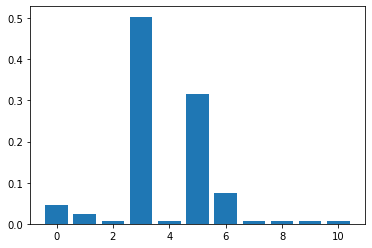

In [32]:

# random forest for feature importance
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
features = X_train.columns
X, y = make_regression(n_samples=1000, n_features=11, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [68]:
# https://www.datainsightonline.com/post/dimensionality-reduction-and-preprocessing-for-machine-learning-in-python

In [36]:
## The example uses dimensionality reduction and a logistic regression prediction model to evaluate the modeling pipeline.
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


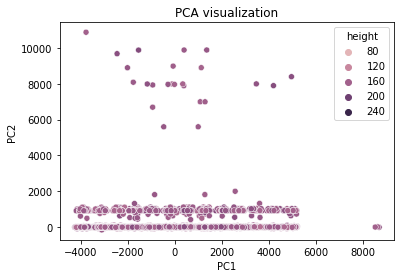

In [18]:
# Split the data into features and labels
X = df.drop('height', axis=1)
y = df['height']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['height'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='height')
plt.title('PCA visualization')
plt.show()

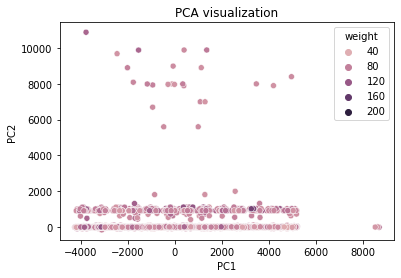

In [23]:
# Split the data into features and labels
X = df.drop('weight', axis=1)
y = df['weight']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['weight'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='weight')
plt.title('PCA visualization')
plt.show()

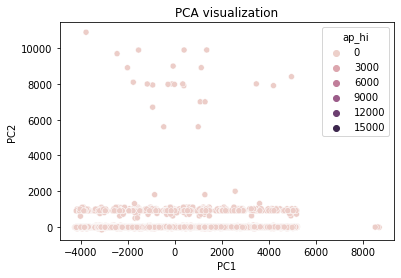

In [24]:
# Split the data into features and labels
X = df.drop('ap_hi', axis=1)
y = df['ap_hi']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['ap_hi'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='ap_hi')
plt.title('PCA visualization')
plt.show()

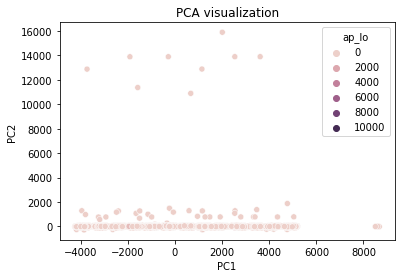

In [26]:
# Split the data into features and labels
X = df.drop('ap_lo', axis=1)
y = df['ap_lo']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['ap_lo'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='ap_lo')
plt.title('PCA visualization')
plt.show()

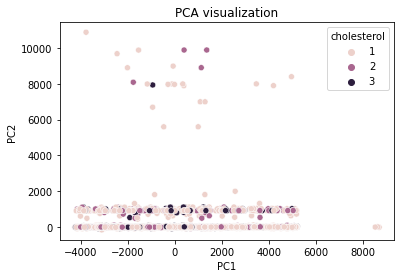

In [28]:
# Split the data into features and labels
X = df.drop('cholesterol', axis=1)
y = df['cholesterol']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['cholesterol'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='cholesterol')
plt.title('PCA visualization')
plt.show()

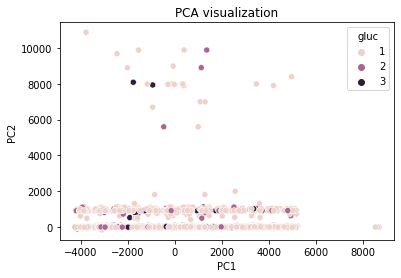

In [29]:
# Split the data into features and labels
X = df.drop('gluc', axis=1)
y = df['gluc']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['gluc'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='gluc')
plt.title('PCA visualization')
plt.show()

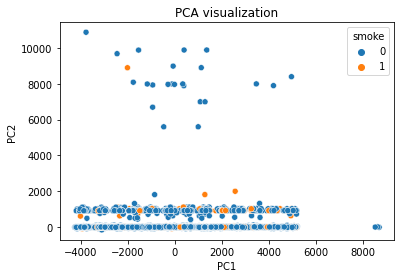

In [30]:
# Split the data into features and labels
X = df.drop('smoke', axis=1)
y = df['smoke']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a new dataframe with the reduced features
data_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the variable back to the reduced dataframe
data_reduced['smoke'] = y

# Visualize the reduced data
sns.scatterplot(data=data_reduced, x='PC1', y='PC2', hue='smoke')
plt.title('PCA visualization')
plt.show()

In [65]:
# Split the data into features and labels
X = df.drop('active', axis=1)
y = df['active']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Add the variable back to the reduced dataframe
data_reduced['active'] = y

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_reduced.shape[1])


Original number of features: 11
Reduced number of features: 2


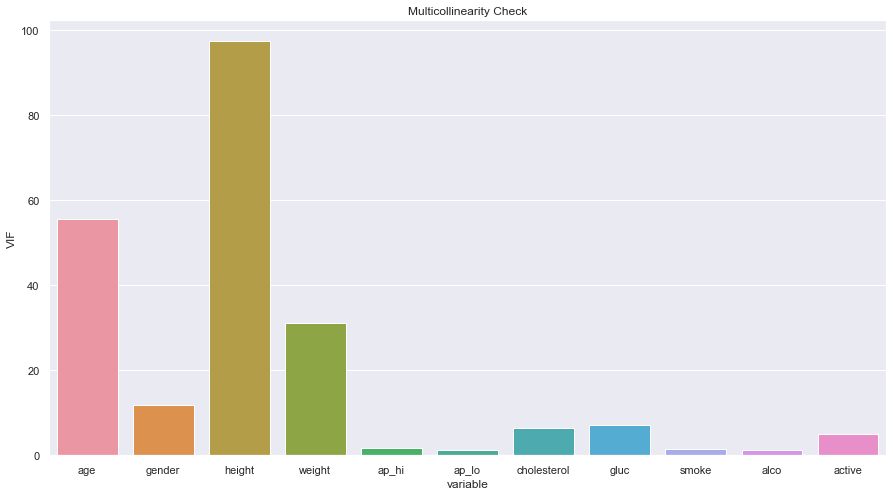

In [53]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Compute the VIF for each independent variable
X = df.drop('cardio', axis=1)
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

sns.set(font_scale=1)
plt.figure(figsize=(15,8))

# Visualize the VIF values
sns.barplot(x='variable', y='VIF', data=vif)
plt.title('Multicollinearity Check')
plt.show()